In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('proteomics.txt', sep='\t', index_col=0)

# Transposing the dataset
# Since I want to cluster the patients (columns) based on their protein expression profiles, I transpose the dataset in order to
# make each column represent a protein, and each row a patient.
df = df.T

# Basic Descriptive Statistics
# print("Descriptive Statistics:\n", df.describe())

# Check for Missing Values
print("\nMissing Values:", df.isnull().sum().sum())



Missing Values: 0


In [15]:
df.head()

Protein_ID,A1BG,A2M,AAMDC,AARS1,AASDHPPT,AASS,ABAT,ABCC4,ABCE1,ABCF1,...,YWHAE,YWHAG,YWHAH,YWHAQ,YWHAZ,ZADH2,ZFHX3,ZNF185,ZNF207,ZYX
BC.1,1.047640e+09,1.304314e+10,35395800.0,77138600.0,1322772.000,2.149774e+07,1.615196e+07,2294820.000,1.101012e+07,24670800.0,...,2.717220e+09,7.508160e+08,577654000.0,1.149346e+09,7.624540e+09,9.264420e+06,4.984337e+05,1.496858e+07,1.708168e+07,102436400.0
BC.2,1.113700e+09,6.184000e+09,58690000.0,96508000.0,9252077.742,3.165600e+06,8.644212e+06,1917313.735,1.235980e+07,8326600.0,...,1.876420e+09,8.162600e+08,480040000.0,1.047000e+09,6.705200e+09,2.910213e+06,3.593441e+05,4.789986e+05,1.293843e+06,292820000.0
BC.3,1.055760e+09,6.564800e+09,9091800.0,46406000.0,3913600.000,4.620000e+06,4.325549e+06,3463000.000,2.843400e+06,7310400.0,...,1.758920e+09,1.137120e+09,697180000.0,1.359340e+09,8.877000e+09,1.543817e+06,6.227843e+05,3.823402e+05,3.410526e+06,168724000.0
BC.4,1.104000e+09,4.329400e+09,41908000.0,17550000.0,1687937.466,5.226863e+06,7.219093e+06,3200134.601,1.423474e+06,6473600.0,...,1.184080e+09,6.620400e+08,473080000.0,7.363200e+08,3.372000e+09,2.494988e+06,3.323255e+05,4.357254e+05,1.235035e+07,651260000.0
BC.5,1.158380e+09,9.797400e+09,39804000.0,56650000.0,5560375.423,9.672200e+06,8.832000e+06,5298370.284,7.971200e+06,7818800.0,...,2.570000e+09,7.799800e+08,419820000.0,1.485820e+09,7.733800e+09,5.560051e+05,8.482400e+07,4.351219e+05,1.137900e+07,213560000.0


In [17]:

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [19]:
scaled_data.shape

(140, 3121)

c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

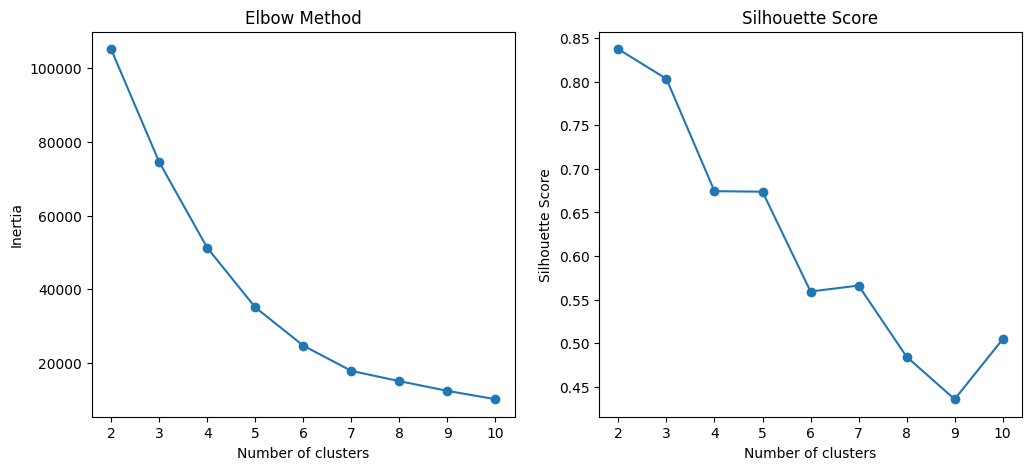

In [20]:
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Determining the number of clusters
inertia = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_result, kmeans.labels_))

# Plotting the elbow method and silhouette scores
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(K_range, inertia, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(K_range, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette Score')

plt.show()


In [21]:

# Choose the optimal number of clusters (e.g., 3) based on your analysis
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Adding cluster information to the dataframe
df['Cluster'] = clusters

# Analyze the clusters
print(df.groupby('Cluster').mean())

Protein_ID           A1BG           A2M         AAMDC         AARS1  \
Cluster                                                               
0            9.332974e+08  8.750709e+09  4.029205e+07  4.556690e+07   
1            1.006398e+09  4.890780e+09  7.410150e+07  6.892560e+07   
2            1.366832e+09  1.208005e+10  5.725322e+07  1.731909e+07   
3            1.025771e+09  8.045418e+09  4.641493e+07  5.800904e+07   
4            9.702298e+08  8.848853e+09  4.473377e+07  6.324765e+07   

Protein_ID       AASDHPPT          AASS          ABAT         ABCC4  \
Cluster                                                               
0            4.712046e+06  8.530466e+06  9.713179e+06  6.313318e+06   
1            4.858208e+06  3.520800e+06  2.938680e+07  9.508860e+06   
2            1.843060e+06  3.008656e+06  4.293254e+06  1.775042e+06   
3            4.936598e+06  5.284116e+06  8.523276e+06  7.447832e+06   
4            6.340719e+06  1.160956e+07  9.770084e+06  4.490328e+06   

Prot

c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
# Print the first few rows of the dataframe to see cluster assignments
print(df.head())


Protein_ID           A1BG           A2M       AAMDC       AARS1     AASDHPPT  \
BC.1         1.047640e+09  1.304314e+10  35395800.0  77138600.0  1322772.000   
BC.2         1.113700e+09  6.184000e+09  58690000.0  96508000.0  9252077.742   
BC.3         1.055760e+09  6.564800e+09   9091800.0  46406000.0  3913600.000   
BC.4         1.104000e+09  4.329400e+09  41908000.0  17550000.0  1687937.466   
BC.5         1.158380e+09  9.797400e+09  39804000.0  56650000.0  5560375.423   

Protein_ID           AASS          ABAT        ABCC4         ABCE1  \
BC.1         2.149774e+07  1.615196e+07  2294820.000  1.101012e+07   
BC.2         3.165600e+06  8.644212e+06  1917313.735  1.235980e+07   
BC.3         4.620000e+06  4.325549e+06  3463000.000  2.843400e+06   
BC.4         5.226863e+06  7.219093e+06  3200134.601  1.423474e+06   
BC.5         9.672200e+06  8.832000e+06  5298370.284  7.971200e+06   

Protein_ID        ABCF1  ...         YWHAG        YWHAH         YWHAQ  \
BC.1         24670800.0  

In [23]:
# Export cluster assignments to a CSV file
df['Cluster'].to_csv('patient_cluster_assignments.csv')


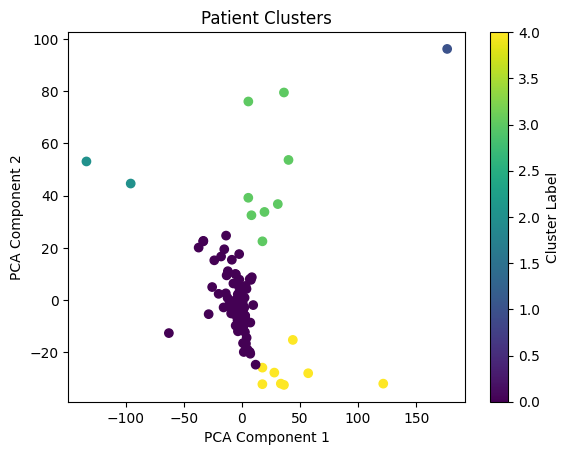

In [24]:
import matplotlib.pyplot as plt

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters)
plt.title('Patient Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
